Notebook demo to show radiative-convective model with:   
1) Grey gas absorbing IR  
2) Grey gas absorbing IR and stellar flux  
3) Grey gas absorbing IR and stellar flux with variable Cp  

In [1]:
%matplotlib inline

I've moved the steps and dry adjustment function into a module to save the amount of code in the notebook - they should be in the same folder on Github

In [18]:
import GreyHeat as Grey
import GreyRadConv as GreyRC
import math,phys
import planets
import matplotlib.pyplot as plt
from ClimateUtilities import *
from IPython import display
from IPython.display import Image

reload(GreyRC)

<module 'GreyRadConv' from 'GreyRadConv.pyc'>

Initialised exactly from GeneralRadConvA example

In [3]:
#==============Now do the calculation====================================

#--------------Initializations-------------------------------------------
    
#----------------Set initial time step--------------------------------

dtime = 1# 1. # (for CO2 case; gray gas evolves faster)


#--------------------Set radmodel options-------------------
#---Instantiate the radiation model---

n = 20

#Set global constants
ps = 1000.
rh = 1.e-30#Relative humidity
rhbdd = 1.e-30
dt = 24.*3600. #time step in seconds
#---Set up pressure array (a global)----
ptop = 50. #Top pressure in mb (Changed from 1mb in original)
pstart = .995*ps
rat = (ptop/pstart)**(1./n)
logLevels = [pstart*rat**i for i in range(n)]
logLevels.reverse()
levels = [ptop + i*(pstart-ptop)/(n-1) for i in range(n)]
#p=Numeric.array(levels,Numeric.Float)
p = numpy.array(logLevels)


#--------------Other parameters-------------------------------------------

#Set the gravity and thermodynamic constants
Rcp = 2./7.

Tg = 280.
#T = Tg*(p/p[-1])**Rcp
T = Tg*numpy.ones(len(p))

Grey.tauInf = 5.

1) Short run with no stellar absorption

Finished!


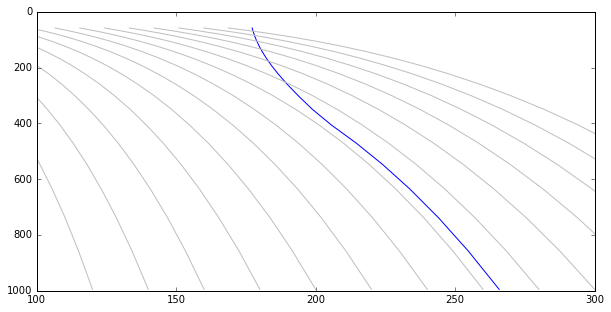

In [4]:
GreyRC.doStellarAbs = False
#---------------------------------------------------------
#--------------Initializations Done-----------------------
#--------------Now do the time stepping-------------------
#---------------------------------------------------------
for i in range(0,10):
    print i
    plt.close()
    #if i%50 == 0 & i > 200:
    #     dtime = .5*dtime
    Tg,Tad,T,flux,fluxStellar,fluxLW,heat,heatStellar,heatLW = GreyRC.steps(Tg,T,5,dtime)
    plt.figure(figsize=(10,5))   
    plt.plot(T,p)
    for i in range(0,400,20):
        Tad = i*(p/p[-1])**Rcp
        plt.plot(Tad,p,'0.75')
    plt.gca().invert_yaxis()
    axes = plt.gca()
    axes.set_xlim([100,300])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #print heatLW
    #print heatStellar
    
display.clear_output(wait=True)
print "Finished!"

Reset T profile

In [5]:
T = Tg*numpy.ones(len(p))

2) I added a basic grey stellar absorption function (fudged from the proper continuum absorption function), and turned up kappa until there's a visible effect

Is the more isothermal lower atmosphere what you were suggesting for this?

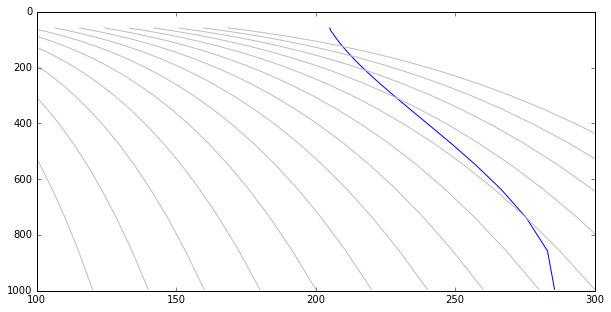

In [6]:
GreyRC.doStellarAbs = True
#---------------------------------------------------------
#--------------Initializations Done-----------------------
#--------------Now do the time stepping-------------------
#---------------------------------------------------------
for i in range(0,10):
    print i
    plt.close()
    #if i%50 == 0 & i > 200:
    #     dtime = .5*dtime
    Tg,Tad,T,flux,fluxStellar,fluxLW,heat,heatStellar,heatLW = GreyRC.steps(Tg,T,5,dtime)
    plt.figure(figsize=(10,5))   
    plt.plot(T,p)
    for i in range(0,400,20):
        Tad = i*(p/p[-1])**Rcp
        plt.plot(Tad,p,'0.75')
    plt.gca().invert_yaxis()
    axes = plt.gca()
    axes.set_xlim([100,300])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #print heatLW
    #print heatStellar

display.clear_output(wait=True)

3) Variable Rcp  
With doVarRcp on, dryAdj recalculates Rcp for each T[i] value  
This is very slow, so if we wanted to use this properly I'd generate a lookup table
The next two graphs start on the Tg=1000K adiabat (saves time, as it runs so slowly) and have doVarRcp on and off respectively.  
To save your time, I've embedded the results after short runs:  
Without variable Cp:  

 



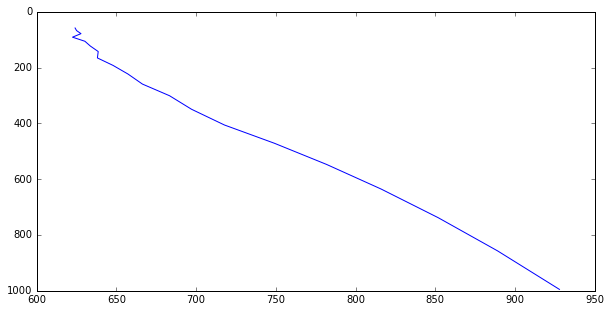

In [24]:
Image("withoutVarRcp.png")

With variable Cp: 

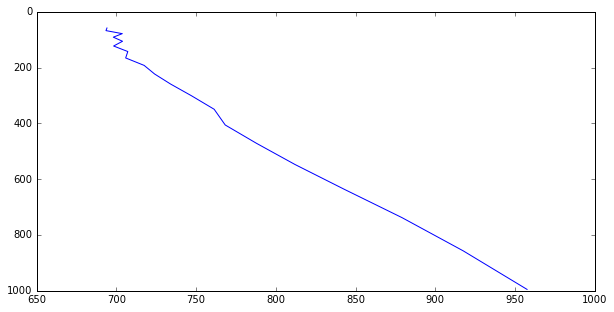

In [25]:
Image("withVarRcp.png")

I think this is the effect I'd expect?  
In the second graph at higher T, Cp is higher so the slope (lapse rate) decreases compared to the first graph?  
They're very short, low res runs so I'm not expecting much accuracy

In [7]:
Tg = 1000.
T = Tg*(p/p[-1])**Rcp
#T = Tg*numpy.ones(len(p))

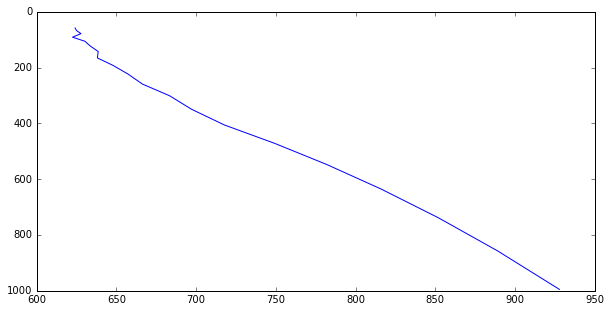

In [8]:
GreyRC.doStellarAbs = True
GreyRC.doVarRcp = False
#---------------------------------------------------------
#--------------Initializations Done-----------------------
#--------------Now do the time stepping-------------------
#---------------------------------------------------------
for i in range(0,10):
    print i
    plt.close()
    #if i%50 == 0 & i > 200:
    #     dtime = .5*dtime
    Tg,Tad,T,flux,fluxStellar,fluxLW,heat,heatStellar,heatLW = GreyRC.steps(Tg,T,5,dtime)
    plt.figure(figsize=(10,5))   
    plt.plot(T,p)
    #for i in range(0,400,20):
    #    Tad = i*(p/p[-1])**Rcp
    #    plt.plot(Tad,p,'0.75')
    plt.gca().invert_yaxis()
    axes = plt.gca()
    #axes.set_xlim([100,300])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #print heatLW
    #print heatStellar

display.clear_output(wait=True)

Run again with variable Cp

In [13]:
Tg = 1000.
T = Tg*(p/p[-1])**Rcp
#T = Tg*numpy.ones(len(p))

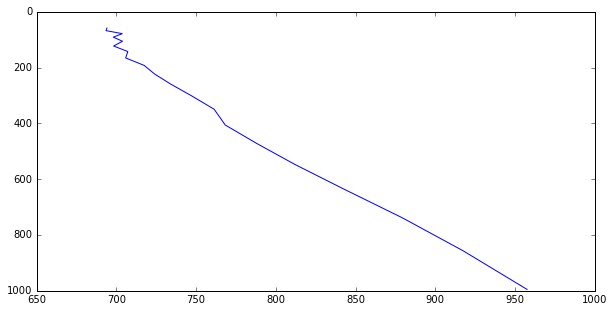

In [14]:
GreyRC.doStellarAbs = True
GreyRC.doVarRcp = True
reload(GreyRC)
#---------------------------------------------------------
#--------------Initializations Done-----------------------
#--------------Now do the time stepping-------------------
#---------------------------------------------------------
for i in range(0,10):
    print i
    plt.close()
    #if i%50 == 0 & i > 200:
    #     dtime = .5*dtime
    Tg,Tad,T,flux,fluxStellar,fluxLW,heat,heatStellar,heatLW = GreyRC.steps(Tg,T,5,dtime)
    plt.figure(figsize=(10,5))   
    plt.plot(T,p)
    #for i in range(000,400,20):
    #    Tad = i*(p/p[-1])**Rcp
    #    plt.plot(Tad,p,'0.75')
    plt.gca().invert_yaxis()
    axes = plt.gca()
    #axes.set_xlim([100,300])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #print heatLW
    #print heatStellar

display.clear_output(wait=True)